<a href="https://colab.research.google.com/github/udaykiranreddykondreddy/Code-for-learn-machinelearning/blob/master/covid-19_EDA/covid_19_Exploratory_Data_Analysis_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://drive.google.com/uc?export=view&id=1xZggtEjnrMp9QBm_4q5RJIfJyfSoSJ9p" height="150" align="left"/>
<h1>&nbsp;<a href="https://instagram.com/learn.machinelearning">Learn.MachineLearning</a></h1>
<h2>&nbsp;Exploratory Data Analysis</h2>
<h3><b>&nbsp;Covid-19 worldwide</b></h3>

In [1]:
# upload your kaggle API token (you can get that from your account)
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Importing libraries
%matplotlib inline

# Run this to create a kaggle environment
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**<h2><b>Step 1 - Getting Data</b></h2>**

**```I'm going to do exploratory data analysis on covid-19 data ```**
- I'm using data from kaggle and github
- Global covid-19 data https://www.kaggle.com/imdevskp/corona-virus-report/
- Global covid-19 data https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/
- India covid-19 data https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset
- Italy covid-19 data https://www.kaggle.com/sudalairajkumar/covid19-in-italy/
- Time series covid-19 data https://github.com/CSSEGISandData/COVID-19.git

In [355]:
# Get data from kaggle 
import zipfile
# Download data
!kaggle datasets download -d imdevskp/corona-virus-report/
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset/
!kaggle datasets download -d imdevskp/covid19-corona-virus-india-dataset
!kaggle datasets download -d sudalairajkumar/covid19-in-italy/
# UnZip data
zip_ref = zipfile.ZipFile("corona-virus-report.zip", 'r')
zip_ref.extractall()
zip_ref = zipfile.ZipFile("novel-corona-virus-2019-dataset.zip", 'r')
zip_ref.extractall()
zip_ref = zipfile.ZipFile("covid19-corona-virus-india-dataset.zip", 'r')
zip_ref.extractall()
zip_ref = zipfile.ZipFile("covid19-in-italy.zip", 'r')
zip_ref.extractall()
zip_ref.close()

corona-virus-report.zip: Skipping, found more recently modified local copy (use --force to force download)
novel-corona-virus-2019-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/8.93k [00:00<?, ?B/s]
100% 8.93k/8.93k [00:00<00:00, 15.1MB/s]
covid19-in-italy.zip: Skipping, found more recently modified local copy (use --force to force download)


In [356]:
!ls

AgeGroupDetails.csv			COVID19_open_line_list.csv
complete.csv				HospitalBedsIndia.csv
complete_data_new_format.csv		ICMRTestingDetails.csv
corona-virus-report.zip			IndividualDetails.csv
covid_19_clean_complete.csv		kaggle.json
covid19-corona-virus-india-dataset.zip	novel-corona-virus-2019-dataset.zip
covid_19_data.csv			population_india_census2011.csv
covid_19_india.csv			sample_data
covid19-in-india.zip			time_series_covid_19_confirmed.csv
covid19-in-italy.zip			time_series_covid_19_deaths.csv
covid19_italy_province.csv		time_series_covid_19_recovered.csv
covid19_italy_region.csv		web_scraping.ipynb
COVID19_line_list_data.csv


In [0]:
# load the data
data = pd.read_csv("covid_19_clean_complete.csv")

In [485]:
data.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [0]:
# Replacing all the NaN values with Country/Region
data["Province/State"].fillna(data["Country/Region"], inplace=True)

In [0]:
# Get the latest data of every country/city
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.strftime('%m/%d/%Y')
data1 = data.sort_values('Date')
data = data1.loc[data1["Date"]==max(data1['Date'])][['Date',"Lat","Long",'Province/State',"Country/Region","Confirmed","Deaths","Recovered"]]

# lets also add active cases in every country
data["Active"] = data["Confirmed"] - data["Deaths"] - data["Recovered"]

In [492]:
data.head(5)

,Date,Lat,Long,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
16802,03/28/2020,-40.9006,174.8860,New Zealand,New Zealand,451,0,50,401
16801,03/28/2020,52.1326,5.2913,Netherlands,Netherlands,9762,639,3,9120
16800,03/28/2020,18.0425,-63.0548,Sint Maarten,Netherlands,3,0,0,3
16792,03/28/2020,43.7333,7.4167,Monaco,Monaco,42,0,1,41
16799,03/28/2020,12.1696,-68.9900,Curacao,Netherlands,8,1,2,5


In [0]:

latest_data_aggregated = data.groupby(["Date","Province/State","Country/Region"],as_index=False)["Date","Lat","Long","Province/State","Country/Region","Confirmed","Deaths","Recovered","Active"].sum()

**<h2>Let's see how it is in country wide with Map</h2>**

**<h4>confirmed cases till now in US</h4>**

In [0]:
us_data = pd.read_csv("covid_19_data.csv")
# Get the latest data of every country/city
us_data['Last Update'] = pd.to_datetime(us_data['Last Update'])
us_data['Last Update'] = us_data['Last Update'].dt.strftime('%m/%d/%Y')
us_data1 = us_data.sort_values('Last Update')
us_data = us_data1.loc[us_data1["Last Update"]==max(us_data1['Last Update'])][['Last Update','Province/State',"Country/Region","Confirmed","Deaths","Recovered"]]

# lets also add active cases in every country
us_data["Active"] = us_data["Confirmed"] - us_data["Deaths"] - us_data["Recovered"]

In [0]:
us_data = us_data[us_data["Country/Region"]=="US"]

In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="us lat and long")
lat, long_data = [],[]
d={}
for i in list(us_data['Province/State']):
  location = geolocator.geocode(i)
  try:
    d[i] = {"lat":location.latitude,"long":location.longitude}
  except:
    d[i] = {"lat":0,"long":0}
us_data["Lat"] = 0
us_data["Long"] = 0
us_data1["Lat"] = 0
us_data1["Long"] = 0

for i in list(us_data['Province/State']):
  us_data.loc[us_data['Province/State'] == i, 'Lat'] = d[i]["lat"]
  us_data.loc[us_data['Province/State'] == i, 'Long'] = d[i]["long"]
  us_data1.loc[us_data1['Province/State'] == i, 'Lat'] = d[i]["lat"]
  us_data1.loc[us_data1['Province/State'] == i, 'Long'] = d[i]["long"]

In [423]:
import folium
latitude = 39.91666667
longitude = 116.383333
world_map = folium.Map(location=[latitude, longitude], zoom_start=3.5,tiles='cartodbpositron')
for lat, lon, Confirmed,Deaths,Recovered,Active,name in zip(us_data['Lat'], us_data['Long'], us_data['Confirmed'],us_data['Deaths'],us_data['Recovered'],us_data['Active'], us_data['Province/State']):
    folium.CircleMarker([lat, lon],
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(Confirmed) + '<br>'
                                '<strong>Active Cases</strong>: ' + str(Active) +'<br>'
                                '<strong>Recovered Cases</strong>: ' + str(Recovered) +'<br>'
                                '<strong>Deaths Cases</strong>: ' + str(Deaths) +'<br>'),
                        color='red',
                        
                        fill_color='#e84545',
                        radius=10).add_to(world_map)
world_map

**<h4>confirmed cases till now in China</h4>**

In [0]:
china_data = latest_data_aggregated[latest_data_aggregated["Country/Region"]=="China"]

In [475]:
import folium
latitude = 39.91666667
longitude = 116.383333
world_map = folium.Map(location=[latitude, longitude], zoom_start=3.5,tiles='cartodbpositron')
for lat, lon, Confirmed,Deaths,Recovered,Active,name in zip(china_data['Lat'], china_data['Long'], china_data['Confirmed'],china_data['Deaths'],china_data['Recovered'],china_data['Active'], china_data['Province/State']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(Confirmed) + '<br>'
                                '<strong>Active Cases</strong>: ' + str(Active) +'<br>'
                                '<strong>Recovered Cases</strong>: ' + str(Recovered) +'<br>'
                                '<strong>Deaths Cases</strong>: ' + str(Deaths) +'<br>'),
                        color='red',
                        
                        fill_color='#e84545',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

**<h4>Cases till now in Italy</h4>**

In [0]:
# Get the latest data of every country/city
italy_Data = pd.read_csv("covid19_italy_region.csv")
italy_Data['Date'] = pd.to_datetime(italy_Data['Date'])
italy_Data['Date'] = italy_Data['Date'].dt.strftime('%m/%d/%Y')
italy_Data1 = italy_Data.sort_values('Date')
italy_Data = italy_Data1.loc[italy_Data1["Date"]==max(italy_Data1['Date'])][['Date',"Latitude","Longitude",'RegionName',"TotalPositiveCases","Deaths","Recovered"]]

# lets also add active cases in every country
italy_Data["Active"] = italy_Data["TotalPositiveCases"] - italy_Data["Deaths"] - italy_Data["Recovered"]
italy_Data.rename(columns={'Latitude':'Lat'}, inplace=True)
italy_Data.rename(columns={'Longitude':'Long'}, inplace=True)
italy_Data.rename(columns={'TotalPositiveCases':'Confirmed'}, inplace=True)

In [496]:
import folium
latitude = 39.91666667
longitude = 116.383333
world_map = folium.Map(location=[latitude, longitude], zoom_start=3.5,tiles='cartodbpositron')
for lat, lon, Confirmed,Deaths,Recovered,Active,name in zip(italy_Data['Lat'], italy_Data['Long'], italy_Data['Confirmed'],italy_Data['Deaths'],italy_Data['Recovered'],italy_Data['Active'], italy_Data['RegionName']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(Confirmed) + '<br>'
                                '<strong>Active Cases</strong>: ' + str(Active) +'<br>'
                                '<strong>Recovered Cases</strong>: ' + str(Recovered) +'<br>'
                                '<strong>Deaths Cases</strong>: ' + str(Deaths) +'<br>'),
                        color='red',
                        
                        fill_color='#e84545' ).add_to(world_map)
world_map

**<h4>Cases till now in India</h4>**

In [0]:
india_data = pd.read_csv("complete.csv")
# Get the latest data of every country/city
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data['Date'] = india_data['Date'].dt.strftime('%m/%d/%Y')
india_data1 = india_data.sort_values('Date')
india_data = india_data1.loc[india_data1["Date"]==max(india_data1['Date'])][['Date','Name of State / UT',"Total Confirmed cases (Indian National)","Total Confirmed cases ( Foreign National )","Cured/Discharged/Migrated","Latitude","Longitude","Death"]]

# lets also add active cases in every country
india_data["Confirmed"] = india_data["Total Confirmed cases (Indian National)"] + india_data["Total Confirmed cases ( Foreign National )"]
india_data["Active"] = india_data["Confirmed"] - india_data["Death"] - india_data['Cured/Discharged/Migrated']
india_data1["Confirmed"] = india_data1["Total Confirmed cases (Indian National)"] + india_data1["Total Confirmed cases ( Foreign National )"]
india_data1["Active"] = india_data1["Confirmed"] - india_data1["Death"] - india_data1['Cured/Discharged/Migrated']

india_data.rename(columns={'Latitude':'Lat','Longitude':"Long",'Cured/Discharged/Migrated':'Cured'}, inplace=True)

In [411]:
import folium
latitude = 39.91666667
longitude = 116.383333
world_map = folium.Map(location=[latitude, longitude], min_zoom=4, max_zoom=6, zoom_start=4 ,tiles='cartodbpositron')
for lat, lon, Confirmed,Deaths,Recovered,Active,name in zip(india_data['Lat'], india_data['Long'], india_data["Confirmed"],india_data['Death'],india_data['Cured'],india_data['Active'], india_data['Name of State / UT']):
    folium.CircleMarker([lat, lon],
                        fill='#e84545',
                        tooltip = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(Confirmed) + '<br>'
                                '<strong>Active Cases</strong>: ' + str(Active) +'<br>'
                                '<strong>Recovered Cases</strong>: ' + str(Recovered) +'<br>'
                                '<strong>Deaths Cases</strong>: ' + str(Deaths) +'<br>'),
                        color='red',
                        radius = 10).add_to(world_map)
world_map

**<h2>Let's see how this is over time in countries</h2>**

**<h4>Let's see how the confirmed cases grown over time in US</h4>**


In [455]:
fig = px.scatter_geo(us_data2, lat="Lat", lon="Long", color='Confirmed', size='Confirmed', projection="natural earth",
                     hover_name="Province/State", scope='world', animation_frame="Last Update", 
                     range_color=[0, max(us_data2['Confirmed'])])
fig.show()

**<h4>Let's see how the confirmed cases grown over time in China</h4>**


In [0]:
data1["Active"] = data1["Confirmed"] - data1["Deaths"] - data1["Recovered"]
latest_data_aggregated = data1.groupby(["Date","Province/State","Country/Region"],as_index=False)["Date","Lat","Long","Province/State","Country/Region","Confirmed","Deaths","Recovered","Active"].sum()
china_data = latest_data_aggregated[latest_data_aggregated["Country/Region"]=="China"]

In [498]:
fig = px.scatter_geo(china_data, lat="Lat", lon="Long", color='Province/State', size='Confirmed', projection="natural earth",
                     hover_name="Province/State", scope='asia', animation_frame="Date", center={'lat':20, 'lon':78}, 
                     range_color=[0, max(china_data['Confirmed'])])
fig.show()

**<h4>Let's see how the confirmed cases grown over time in Italy</h4>**


In [0]:
# lets also add active cases in every country
italy_Data1["Active"] = italy_Data1["TotalPositiveCases"] - italy_Data1["Deaths"] - italy_Data1["Recovered"]

In [500]:
fig = px.scatter_geo(italy_Data1, lat="Latitude", lon="Longitude", color='RegionName', size='TotalPositiveCases', projection="natural earth",
                     hover_name="RegionName", scope='europe', animation_frame="Date", 
                     range_color=[0, max(italy_Data1['TotalPositiveCases'])])
fig.show()

**<h4>Let's see how the confirmed cases grown over time in India</h4>**


In [501]:
fig = px.scatter_geo(india_data1, lat="Latitude", lon="Longitude", color='Confirmed', size='Confirmed', projection="natural earth",
                     hover_name="State/UT", scope='asia', animation_frame="Date", center={'lat':20, 'lon':78}, 
                     range_color=[0, max(india_data1['Confirmed'])])
fig.show()

**<h1>lets see the top 15 states in coutries</h1>**

**<h4>lets see the top 15 states in coutries with confirmed cases</h4>**



In [0]:
latest_data = data1.loc[data1["Date"]==max(data1['Date'])][['Date',"Lat","Long",'Province/State',"Country/Region","Confirmed","Deaths","Recovered"]]
latest_data_aggregated = latest_data.groupby(["Date","Province/State","Country/Region"],as_index=False)["Date","Lat","Long","Province/State","Country/Region","Confirmed","Deaths","Recovered"].sum()
china_data = latest_data_aggregated[latest_data_aggregated["Country/Region"]=="China"]

In [506]:
from plotly.subplots import make_subplots

# Confirmed cases in China
fig_c = px.bar(china_data.sort_values('Confirmed', ascending=False)[:15][::-1], 
             x='Confirmed', y='Province/State',text='Confirmed', orientation='h')
#fig.show()

# Confirmed cases in US

fig_d = px.bar(us_data.sort_values('Confirmed', ascending=False)[:15][::-1], 
             x='Confirmed', y='Province/State', text='Confirmed', orientation='h')
#fig.show()

# Confirmed cases in Italy
fig_r = px.bar(italy_Data.sort_values('Confirmed', ascending=False)[:15][::-1], 
             x='Confirmed', y='RegionName', text='Confirmed', orientation='h')
#fig.show()

# Confirmed cases in India
fig_a = px.bar(india_data.sort_values('Confirmed', ascending=False)[:15][::-1], 
             x='Confirmed', y='Name of State / UT', text='Confirmed', orientation='h')
#fig.show()


fig = make_subplots(rows=2, cols=2, shared_xaxes=False, vertical_spacing=0.08, horizontal_spacing=0.1,
                    subplot_titles=("Confirmed China", "Confirmed us", "Confirmed Italy", "Confirmed India"))
fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)
fig.add_trace(fig_r['data'][0], row=2, col=1)
fig.add_trace(fig_a['data'][0], row=2, col=2)
fig.update_layout(height=800, title_text="Top 15")

**<h4>lets see the top 15 states in coutries with Death cases</h4>**





In [512]:
from plotly.subplots import make_subplots

# Deaths cases in China
fig_c = px.bar(china_data.sort_values('Deaths', ascending=False)[:15][::-1], 
             x='Deaths', y='Province/State',text='Deaths', orientation='h')
#fig.show()

# Deaths cases in US

fig_d = px.bar(us_data.sort_values('Deaths', ascending=False)[:15][::-1], 
             x='Deaths', y='Province/State', text='Deaths', orientation='h')
#fig.show()

# Deaths cases in Italy
fig_r = px.bar(italy_Data.sort_values('Deaths', ascending=False)[:15][::-1], 
             x='Deaths', y='RegionName', text='Deaths', orientation='h')
#fig.show()

# Deaths cases in India
fig_a = px.bar(india_data.sort_values('Death', ascending=False)[:15][::-1], 
             x='Death', y='Name of State / UT', text='Death', orientation='h')
#fig.show()


fig = make_subplots(rows=2, cols=2, shared_xaxes=False, vertical_spacing=0.08, horizontal_spacing=0.1,
                    subplot_titles=("Deaths China", "Deaths us", "Deaths Italy", "Deaths India"))
fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)
fig.add_trace(fig_r['data'][0], row=2, col=1)
fig.add_trace(fig_a['data'][0], row=2, col=2)
fig.update_layout(height=800, title_text="Top 15")

**<h4>lets see the top 15 states in Recovered with Death cases</h4>**





In [513]:
from plotly.subplots import make_subplots

# Recovered cases in China
fig_c = px.bar(china_data.sort_values('Recovered', ascending=False)[:15][::-1], 
             x='Recovered', y='Province/State',text='Recovered', orientation='h')
#fig.show()

# Recovered cases in US

fig_d = px.bar(us_data.sort_values('Recovered', ascending=False)[:15][::-1], 
             x='Recovered', y='Province/State', text='Recovered', orientation='h')
#fig.show()

# Recovered cases in Italy
fig_r = px.bar(italy_Data.sort_values('Recovered', ascending=False)[:15][::-1], 
             x='Recovered', y='RegionName', text='Recovered', orientation='h')
#fig.show()

# Deaths cases in India
fig_a = px.bar(india_data.sort_values('Cured', ascending=False)[:15][::-1], 
             x='Cured', y='Name of State / UT', text='Cured', orientation='h')
#fig.show()


fig = make_subplots(rows=2, cols=2, shared_xaxes=False, vertical_spacing=0.08, horizontal_spacing=0.1,
                    subplot_titles=("Recovered China", "Recovered us", "Recovered Italy", "Recovered India"))
fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)
fig.add_trace(fig_r['data'][0], row=2, col=1)
fig.add_trace(fig_a['data'][0], row=2, col=2)
fig.update_layout(height=800, title_text="Top 15")

**<h1>lets see how these are over time country wide with line charts</h1>**

In [0]:
latest_data_aggregated = data1.groupby(["Date","Country/Region"],as_index=False)["Date","Lat","Long","Province/State","Country/Region","Confirmed","Deaths","Recovered","Active"].sum()
china_data = latest_data_aggregated[latest_data_aggregated["Country/Region"]=="China"]
us_data = latest_data_aggregated[latest_data_aggregated["Country/Region"]=="US"]
italy_Data = latest_data_aggregated[latest_data_aggregated["Country/Region"]=="Italy"]
india_data = latest_data_aggregated[latest_data_aggregated["Country/Region"]=="India"]


**<h4>lets see how confirmed cases over countries line charts</h4>**

In [525]:
# confirmed cases china
fig_c = px.line(china_data, x="Date", y="Confirmed")

# confirmed cases us
fig_d = px.line(us_data, x="Date", y="Confirmed")

# confirmed cases italy
fig_r = px.line(italy_Data, x="Date", y="Confirmed")

# confirmed cases india
fig_a = px.line(india_data, x="Date", y="Confirmed")

fig = make_subplots(rows=2, cols=2, shared_xaxes=False, vertical_spacing=0.2, horizontal_spacing=0.1,
                    subplot_titles=("confirmed cases china", "confirmed cases us", "confirmed cases italy", "confirmed cases india"))
fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)
fig.add_trace(fig_r['data'][0], row=2, col=1)
fig.add_trace(fig_a['data'][0], row=2, col=2)
fig.update_layout(height=800, title_text="Worwide data over time")

**<h1>lets see how these are over country wide with line charts(Logarithmic Scale)</h1>**

In [529]:
# confirmed cases china
fig_c = px.line(china_data, x="Date", y="Confirmed", log_y=True, title="confirmed cases china")
fig_c.show()
# confirmed cases us
fig_d = px.line(us_data, x="Date", y="Confirmed", log_y=True, title="confirmed cases us")
fig_d.show()
# confirmed cases italy
fig_r = px.line(italy_Data, x="Date", y="Confirmed", log_y=True, title="confirmed cases italy")
fig_r.show()
# confirmed cases india
fig_a = px.line(india_data, x="Date", y="Confirmed", log_y=True, title="confirmed cases india")
fig_a.show()

**<h1>Bar plots</h1>**

In [531]:
# confirmed cases china
fig_c = px.bar(china_data, x="Date", y="Confirmed", barmode='group',
             height=400)

# Dconfirmed cases US
fig_d = px.bar(us_data, x="Date", y="Deaths", barmode='group',
             height=400)

# confirmed cases Italy
fig_r = px.bar(italy_Data, x="Date", y="Recovered", barmode='group',
             height=400)

# confirmed cases India
fig_a = px.bar(india_data, x="Date", y="Active", barmode='group',
             height=400)

fig = make_subplots(rows=2, cols=2, shared_xaxes=False, vertical_spacing=0.2, horizontal_spacing=0.1,
                    subplot_titles=("Confirmed cases china", "Confirmed cases US", "Confirmed cases Italy", "Confirmed cases India"))
fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)
fig.add_trace(fig_r['data'][0], row=2, col=1)
fig.add_trace(fig_a['data'][0], row=2, col=2)
fig.update_layout(height=800, title_text="country data over time",plot_bgcolor='rgb(250, 242, 242)')

**<h1>Deats per 100 Confirmed cases</h1>**

**<h4>Deats per 100 Confirmed cases in China</h4>**

In [533]:
china_data

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active
34,01/22/2020,China,1083.3367,3684.4197,548,17,28,503
211,01/23/2020,China,1083.3367,3684.4197,643,18,30,595
388,01/24/2020,China,1083.3367,3684.4197,920,26,36,858
565,01/25/2020,China,1083.3367,3684.4197,1406,42,39,1325
742,01/26/2020,China,1083.3367,3684.4197,2075,56,49,1970
...,...,...,...,...,...,...,...,...
11008,03/24/2020,China,1083.3367,3684.4197,81591,3281,73280,5030
11185,03/25/2020,China,1083.3367,3684.4197,81661,3285,73773,4603
11362,03/26/2020,China,1083.3367,3684.4197,81782,3291,74181,4310
11539,03/27/2020,China,1083.3367,3684.4197,81897,3296,74720,3881


**<h1>Deats per 100 Confirmed cases</h1>**

**<h4>Deats per 100 Confirmed cases in china</h4>**

In [535]:
data = data1[data1['Date'] == max(data1['Date'])]
latest_data_aggregated = data.groupby(["Date","Province/State","Country/Region"],as_index=False)["Date","Lat","Long","Province/State","Country/Region","Confirmed","Deaths","Recovered","Active"].sum()
flg = latest_data_aggregated[latest_data_aggregated["Country/Region"]=="China"]

flg['mortalityRate'] = round((flg['Deaths']/flg['Confirmed'])*100, 2)
temp = flg[flg['Confirmed']>100]
temp = temp.sort_values('mortalityRate', ascending=False)

fig = px.bar(temp.sort_values(by="mortalityRate", ascending=False)[:10][::-1],
             x = 'mortalityRate', y = 'Province/State', 
             title='Deaths per 100 Confirmed Cases', text='mortalityRate', height=800, orientation='h',
             color_discrete_sequence=['darkred']
            )
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**<h4>Deats per 100 Confirmed cases in US</h4>**

In [539]:
data = us_data1[us_data1['Last Update'] == max(us_data1['Last Update'])]
latest_data_aggregated = data.groupby(["Last Update","Province/State","Country/Region"],as_index=False)["Last Update","Lat","Long","Province/State","Country/Region","Confirmed","Deaths","Recovered"].sum()
flg = latest_data_aggregated[latest_data_aggregated["Country/Region"]=="US"]

flg['mortalityRate'] = round((flg['Deaths']/flg['Confirmed'])*100, 2)
temp = flg[flg['Confirmed']>100]
temp = temp.sort_values('mortalityRate', ascending=False)

fig = px.bar(temp.sort_values(by="mortalityRate", ascending=False)[:10][::-1],
             x = 'mortalityRate', y = 'Province/State', 
             title='Deaths per 100 Confirmed Cases', text='mortalityRate', height=800, orientation='h',
             color_discrete_sequence=['darkred']
            )
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**<h4>Deats per 100 Confirmed cases in Italy</h4>**

In [551]:
data = italy_Data1[italy_Data1['Date'] == max(italy_Data1['Date'])]
flg = data.groupby(["Date","RegionName"],as_index=False)["Date","RegionName","TotalPositiveCases","Deaths","Recovered"].sum()

flg['mortalityRate'] = round((flg['Deaths']/flg['TotalPositiveCases'])*100, 2)
temp = flg[flg['TotalPositiveCases']>100]
temp = temp.sort_values('mortalityRate', ascending=False)

fig = px.bar(temp.sort_values(by="mortalityRate", ascending=False)[:10][::-1],
             x = 'mortalityRate', y = 'RegionName', 
             title='Deaths per 100 Confirmed Cases', text='mortalityRate', height=800, orientation='h',
             color_discrete_sequence=['darkred']
            )
fig.show()

**<h4>Deats per 100 Confirmed cases in India</h4>**

In [558]:
data = india_data1[india_data1['Date'] == max(india_data1['Date'])]
flg = data.groupby(["Date","State/UT"],as_index=False)["Date","State/UT","Confirmed","Death","Cured/Discharged/Migrated"].sum()

flg['mortalityRate'] = round((flg['Death']/flg['Confirmed'])*100, 2)
temp = flg[flg['Confirmed']>100]
temp = temp.sort_values('mortalityRate', ascending=False)

fig = px.bar(temp.sort_values(by="mortalityRate", ascending=False)[:10][::-1],
             x = 'mortalityRate', y = 'State/UT', 
             title='Deaths per 100 Confirmed Cases', text='mortalityRate', height=800, orientation='h',
             color_discrete_sequence=['darkred']
            )
fig.show()

**<h1>Active vs Recovered vs Deaths plot</h1>**

**<h4>Active vs Recovered vs Deaths plot in China</h4>**

In [562]:
import plotly.graph_objs as go

china_data = data1[data1['Date'] == max(data1['Date'])]
china_data = china_data[china_data["Country/Region"]=="China"]
temp = china_data.sort_values('Confirmed', ascending=False)[:15][::-1]
fig = go.Figure(data=[
    go.Bar(name='Active', y=temp['Province/State'], x=temp['Active'], orientation='h'),
    go.Bar(name='Deaths', y=temp['Province/State'], x=temp['Deaths'], orientation='h'),
    go.Bar(name='Recovered', y=temp['Province/State'], x=temp['Recovered'], orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='stack', height=900)
fig.update_traces(textposition='outside')
fig.show()

**<h4>Active vs Recovered vs Deaths plot in US</h4>**

In [567]:
import plotly.graph_objs as go

us_data = us_data1[us_data1['Last Update'] == max(us_data1['Last Update'])]
us_data = us_data[us_data["Country/Region"]=="US"]
temp = us_data.sort_values('Confirmed', ascending=False)[:15][::-1]
fig = go.Figure(data=[
    go.Bar(name='Active', y=temp['Province/State'], x=temp['Confirmed'], orientation='h'),
    go.Bar(name='Deaths', y=temp['Province/State'], x=temp['Deaths'], orientation='h'),
    go.Bar(name='Recovered', y=temp['Province/State'], x=temp['Recovered'], orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='stack', height=900)
fig.update_traces(textposition='outside')
fig.show()

**<h4>Active vs Recovered vs Deaths plot in Italy</h4>**

In [572]:
import plotly.graph_objs as go

italy_Data = italy_Data1[italy_Data1['Date'] == max(italy_Data1['Date'])]
temp = italy_Data.sort_values('TotalPositiveCases', ascending=False)[:15][::-1]
fig = go.Figure(data=[
    go.Bar(name='Active', y=temp['RegionName'], x=temp['TotalPositiveCases'], orientation='h'),
    go.Bar(name='Deaths', y=temp['RegionName'], x=temp['Deaths'], orientation='h'),
    go.Bar(name='Recovered', y=temp['RegionName'], x=temp['Recovered'], orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='stack', height=900)
fig.update_traces(textposition='outside')
fig.show()

**<h4>Active vs Recovered vs Deaths plot in India</h4>**

In [575]:
import plotly.graph_objs as go

india_data = india_data1[india_data1['Date'] == max(india_data1['Date'])]
temp = india_data.sort_values('Confirmed', ascending=False)[:15][::-1]
fig = go.Figure(data=[
    go.Bar(name='Active', y=temp['State/UT'], x=temp['Confirmed'], orientation='h'),
    go.Bar(name='Deaths', y=temp['State/UT'], x=temp['Death'], orientation='h'),
    go.Bar(name='Recovered', y=temp['State/UT'], x=temp['Cured/Discharged/Migrated'], orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='stack', height=900)
fig.update_traces(textposition='outside')
fig.show()

**<h1>Pie charts of cases country wise</h1>**

**<h4>Pie charts of cases in china</h4>**

In [577]:
# Confirmed cases in china
fig = px.pie(china_data, values='Confirmed', names='Province/State', title='Confirmed cases worldwide')
fig.show()

# Recovered Cases in china
fig = px.pie(china_data, values='Recovered', names='Province/State', title='Recovered cases worldwide')
fig.show()

# Death cases in china
fig = px.pie(china_data, values='Deaths', names='Province/State', title='Death cases worldwide')
fig.show()

**<h4>Pie charts of cases in US</h4>**

In [578]:
# Confirmed cases in US
fig = px.pie(us_data, values='Confirmed', names='Province/State', title='Confirmed cases worldwide')
fig.show()

# Recovered Cases in US
fig = px.pie(us_data, values='Recovered', names='Province/State', title='Recovered cases worldwide')
fig.show()

# Death cases in US
fig = px.pie(us_data, values='Deaths', names='Province/State', title='Death cases worldwide')
fig.show()

**<h4>Pie charts of cases in italy</h4>**

In [579]:
# Confirmed cases in Italy
fig = px.pie(italy_Data, values='Confirmed', names='RegionName', title='Confirmed cases worldwide')
fig.show()

# Recovered Cases in Italy
fig = px.pie(italy_Data, values='Recovered', names='RegionName', title='Recovered cases worldwide')
fig.show()

# Death cases in Italy
fig = px.pie(italy_Data, values='Deaths', names='RegionName', title='Death cases worldwide')
fig.show()

**<h4>Pie charts of cases in India</h4>**

In [581]:
# Confirmed cases in India
fig = px.pie(india_data, values='Confirmed', names='State/UT', title='Confirmed cases worldwide')
fig.show()

# Recovered Cases in India
fig = px.pie(india_data, values='Cured/Discharged/Migrated', names='State/UT', title='Recovered cases worldwide')
fig.show()

# Death cases in India
fig = px.pie(india_data, values='Death', names='State/UT', title='Death cases worldwide')
fig.show()

**<h1>Active vs Death vs Recovered through Pie charts of cases in India</h1>**

In [0]:
data = data1[data1['Date'] == max(data1['Date'])]
china_data = data[data["Country/Region"]=="China"]
china_data = china_data.groupby("Date",as_index=False)["Confirmed","Deaths","Recovered","Active"].sum()
us_data = data[data["Country/Region"]=="US"]
italy_data = data[data["Country/Region"]=="Italy"]
india_data = data[data["Country/Region"]=="India"]

**<h4>Pie charts of cases in China</h4>**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



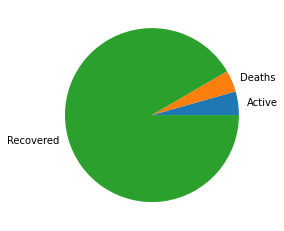

In [609]:
plt.pie([china_data["Active"], china_data["Deaths"], china_data["Recovered"]], labels=["Active","Deaths","Recovered"],
           autopct=None)
plt.show()